### Importação dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Lava louças,eletrodomesticos,1446.46,74.604083,11/11/2022,Rafael Costa,SP,4,cartao_credito,3,-22.19,-48.79
1,Cama box,moveis,631.70,33.919251,03/01/2020,Thiago Silva,GO,5,cartao_credito,2,-15.98,-49.86
2,Bola de basquete,esporte e lazer,31.54,0.000000,25/12/2022,Larissa Alves,MG,5,boleto,1,-18.10,-44.38
3,Modelagem preditiva,livros,76.93,1.680730,23/11/2021,Lucas Oliveira,MG,3,boleto,1,-18.10,-44.38
4,Fone de ouvido,eletronicos,185.14,7.442587,25/04/2022,Bianca Santos,SP,4,cartao_credito,7,-22.19,-48.79


#1. Análise do faturamento


                 Produto Categoria do Produto    Preço      Frete  \
0     Assistente virtual          eletronicos   219.08   9.249790   
1         Mesa de jantar               moveis   256.35  11.234305   
2      Jogo de tabuleiro           brinquedos   279.51  21.262681   
3            Micro-ondas     eletrodomesticos  1009.99  54.667344   
4  Cadeira de escritório               moveis   446.99  26.964689   

  Data da Compra        Vendedor Local da compra  Avaliação da compra  \
0     16/01/2021     Pedro Gomes              SP                    4   
1     18/05/2022  Beatriz Moraes              RJ                    1   
2     15/03/2021      João Souza              DF                    1   
3     03/05/2022      João Souza              RS                    4   
4     07/11/2020   Larissa Alves              MG                    5   

  Tipo de pagamento  Quantidade de parcelas    lat    lon  
0    cartao_credito                       8 -22.19 -48.79  
1    cartao_credito       

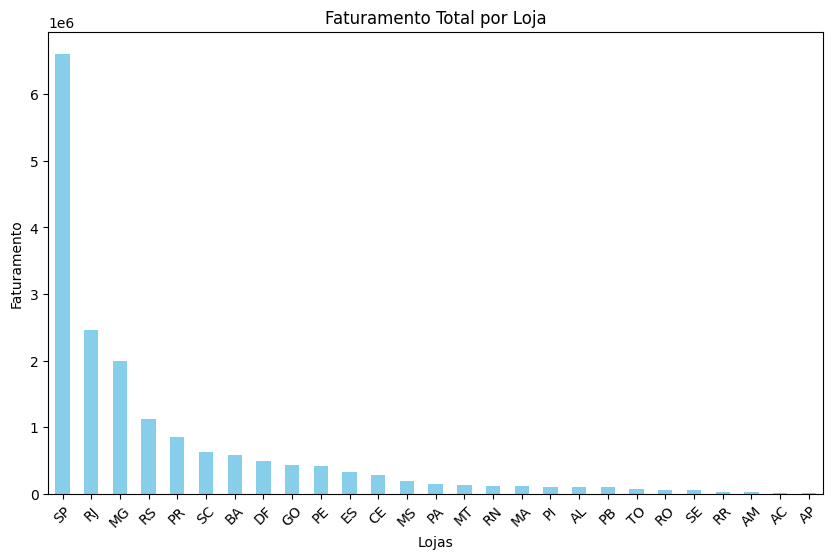

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# URLs dos arquivos CSV
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

# Carregar os dados das lojas
loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

# Concatenar todos os DataFrames em um só
df = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

# Exibir as primeiras linhas e as colunas para verificar os nomes
print(df.head())
print(df.columns)  # Mostrar as colunas para verificar como estão nomeadas

# Garantir que as colunas estão sem espaços extras
df.columns = df.columns.str.strip()

# Agora, vamos calcular o faturamento por loja.
# Considerando que o 'Preço' seja o valor de cada produto e multiplicando pela 'Quantidade de parcelas'
# Podemos fazer isso de forma simplificada, somando o preço de todos os produtos vendidos por cada loja.

df['Faturamento'] = df['Preço'] * df['Quantidade de parcelas']

# Analisar o faturamento total por loja
faturamento_por_loja = df.groupby('Local da compra')['Faturamento'].sum().sort_values(ascending=False)

# Exibir o faturamento total por loja
print(faturamento_por_loja)

# Visualização do faturamento total por loja
plt.figure(figsize=(10, 6))
faturamento_por_loja.plot(kind='bar', color='skyblue')
plt.title('Faturamento Total por Loja')
plt.xlabel('Lojas')
plt.ylabel('Faturamento')
plt.xticks(rotation=45)
plt.show()


# 2. Vendas por Categoria


                 Produto Categoria do Produto    Preço      Frete  \
0     Assistente virtual          eletronicos   219.08   9.249790   
1         Mesa de jantar               moveis   256.35  11.234305   
2      Jogo de tabuleiro           brinquedos   279.51  21.262681   
3            Micro-ondas     eletrodomesticos  1009.99  54.667344   
4  Cadeira de escritório               moveis   446.99  26.964689   

  Data da Compra        Vendedor Local da compra  Avaliação da compra  \
0     16/01/2021     Pedro Gomes              SP                    4   
1     18/05/2022  Beatriz Moraes              RJ                    1   
2     15/03/2021      João Souza              DF                    1   
3     03/05/2022      João Souza              RS                    4   
4     07/11/2020   Larissa Alves              MG                    5   

  Tipo de pagamento  Quantidade de parcelas    lat    lon  
0    cartao_credito                       8 -22.19 -48.79  
1    cartao_credito       

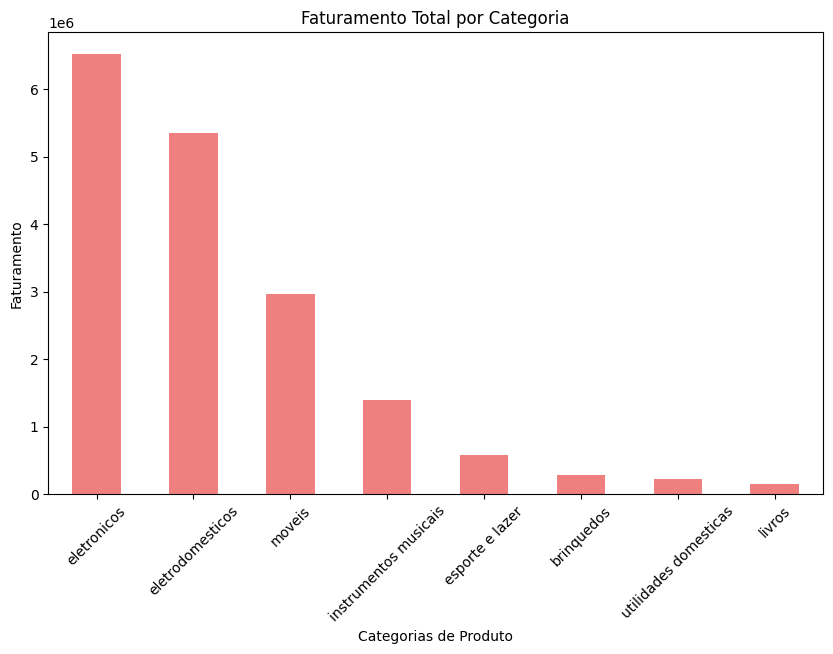

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# URLs dos arquivos CSV
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

# Carregar os dados das lojas
loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

# Concatenar todos os DataFrames em um só
df = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

# Exibir as primeiras linhas e as colunas para verificar os nomes
print(df.head())
print(df.columns)  # Mostrar as colunas para verificar como estão nomeadas

# Garantir que as colunas estão sem espaços extras
df.columns = df.columns.str.strip()

# Criar a coluna de faturamento
df['Faturamento'] = df['Preço'] * df['Quantidade de parcelas']

# Analisar o faturamento total por categoria
faturamento_por_categoria = df.groupby('Categoria do Produto')['Faturamento'].sum().sort_values(ascending=False)

# Exibir o faturamento total por categoria
print(faturamento_por_categoria)

# Visualização do faturamento total por categoria
plt.figure(figsize=(10, 6))
faturamento_por_categoria.plot(kind='bar', color='lightcoral')
plt.title('Faturamento Total por Categoria')
plt.xlabel('Categorias de Produto')
plt.ylabel('Faturamento')
plt.xticks(rotation=45)
plt.show()


# 3. Média de Avaliação das Lojas

                 Produto Categoria do Produto    Preço      Frete  \
0     Assistente virtual          eletronicos   219.08   9.249790   
1         Mesa de jantar               moveis   256.35  11.234305   
2      Jogo de tabuleiro           brinquedos   279.51  21.262681   
3            Micro-ondas     eletrodomesticos  1009.99  54.667344   
4  Cadeira de escritório               moveis   446.99  26.964689   

  Data da Compra        Vendedor Local da compra  Avaliação da compra  \
0     16/01/2021     Pedro Gomes              SP                    4   
1     18/05/2022  Beatriz Moraes              RJ                    1   
2     15/03/2021      João Souza              DF                    1   
3     03/05/2022      João Souza              RS                    4   
4     07/11/2020   Larissa Alves              MG                    5   

  Tipo de pagamento  Quantidade de parcelas    lat    lon  
0    cartao_credito                       8 -22.19 -48.79  
1    cartao_credito       

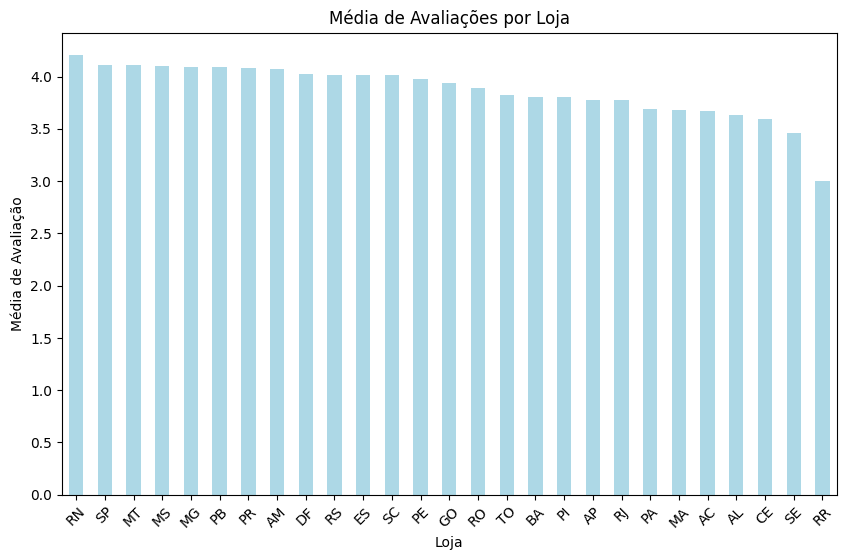

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# URLs dos arquivos CSV
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

# Carregar os dados das lojas
loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

# Concatenar todos os DataFrames em um só
df = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

# Exibir as primeiras linhas e as colunas para verificar os nomes
print(df.head())
print(df.columns)  # Mostrar as colunas para verificar como estão nomeadas

# Garantir que as colunas estão sem espaços extras
df.columns = df.columns.str.strip()

# Calcular a média das avaliações por loja
media_avaliacoes_por_loja = df.groupby('Local da compra')['Avaliação da compra'].mean().sort_values(ascending=False)

# Exibir a média de avaliações por loja
print(media_avaliacoes_por_loja)

# Visualização da média de avaliações por loja
plt.figure(figsize=(10, 6))
media_avaliacoes_por_loja.plot(kind='bar', color='lightblue')
plt.title('Média de Avaliações por Loja')
plt.xlabel('Loja')
plt.ylabel('Média de Avaliação')
plt.xticks(rotation=45)
plt.show()


# 4. Produtos Mais e Menos Vendidos

                 Produto Categoria do Produto    Preço      Frete  \
0     Assistente virtual          eletronicos   219.08   9.249790   
1         Mesa de jantar               moveis   256.35  11.234305   
2      Jogo de tabuleiro           brinquedos   279.51  21.262681   
3            Micro-ondas     eletrodomesticos  1009.99  54.667344   
4  Cadeira de escritório               moveis   446.99  26.964689   

  Data da Compra        Vendedor Local da compra  Avaliação da compra  \
0     16/01/2021     Pedro Gomes              SP                    4   
1     18/05/2022  Beatriz Moraes              RJ                    1   
2     15/03/2021      João Souza              DF                    1   
3     03/05/2022      João Souza              RS                    4   
4     07/11/2020   Larissa Alves              MG                    5   

  Tipo de pagamento  Quantidade de parcelas    lat    lon  
0    cartao_credito                       8 -22.19 -48.79  
1    cartao_credito       

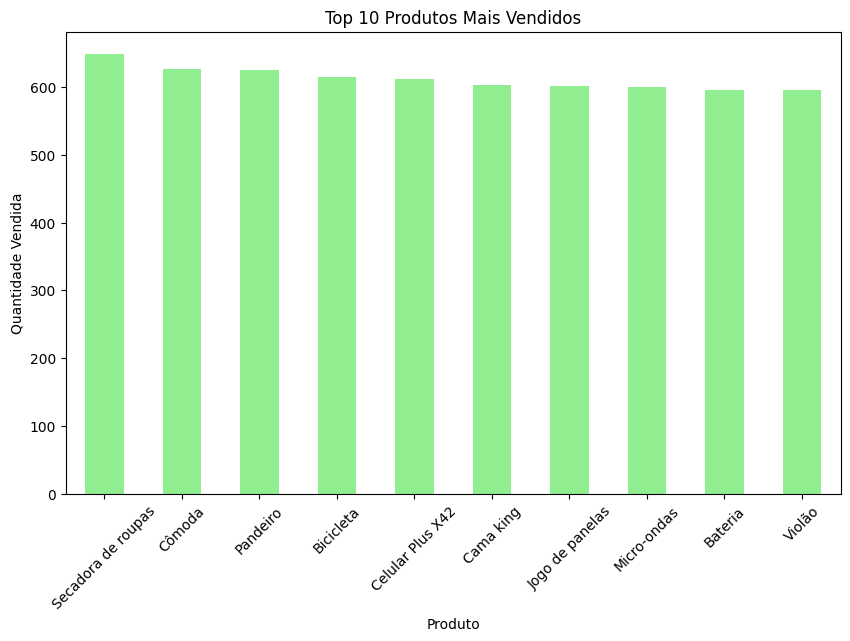

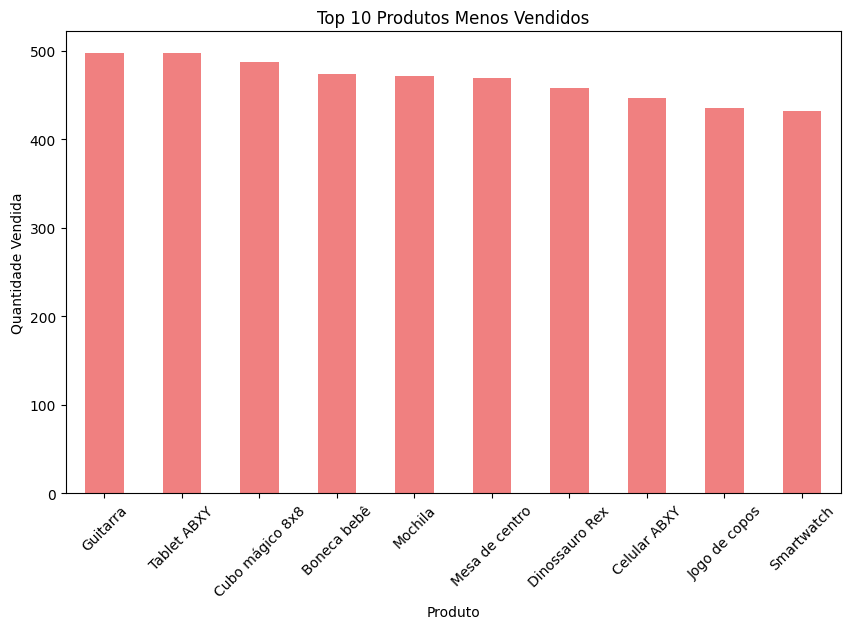

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# URLs dos arquivos CSV
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

# Carregar os dados das lojas
loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

# Concatenar todos os DataFrames em um só
df = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

# Exibir as primeiras linhas e as colunas para verificar os nomes
print(df.head())
print(df.columns)  # Mostrar as colunas para verificar como estão nomeadas

# Garantir que as colunas estão sem espaços extras
df.columns = df.columns.str.strip()

# Calcular a quantidade total vendida de cada produto
quantidade_vendida_por_produto = df.groupby('Produto')['Quantidade de parcelas'].sum().sort_values(ascending=False)

# Exibir os produtos mais e menos vendidos
print("Produtos mais vendidos:")
print(quantidade_vendida_por_produto.head())  # Produtos mais vendidos

print("\nProdutos menos vendidos:")
print(quantidade_vendida_por_produto.tail())  # Produtos menos vendidos

# Visualização dos produtos mais vendidos
plt.figure(figsize=(10, 6))
quantidade_vendida_por_produto.head(10).plot(kind='bar', color='lightgreen')
plt.title('Top 10 Produtos Mais Vendidos')
plt.xlabel('Produto')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=45)
plt.show()

# Visualização dos produtos menos vendidos
plt.figure(figsize=(10, 6))
quantidade_vendida_por_produto.tail(10).plot(kind='bar', color='lightcoral')
plt.title('Top 10 Produtos Menos Vendidos')
plt.xlabel('Produto')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=45)
plt.show()


[texto do link](https://)# 5. Frete Médio por Loja


                 Produto Categoria do Produto    Preço      Frete  \
0     Assistente virtual          eletronicos   219.08   9.249790   
1         Mesa de jantar               moveis   256.35  11.234305   
2      Jogo de tabuleiro           brinquedos   279.51  21.262681   
3            Micro-ondas     eletrodomesticos  1009.99  54.667344   
4  Cadeira de escritório               moveis   446.99  26.964689   

  Data da Compra        Vendedor Local da compra  Avaliação da compra  \
0     16/01/2021     Pedro Gomes              SP                    4   
1     18/05/2022  Beatriz Moraes              RJ                    1   
2     15/03/2021      João Souza              DF                    1   
3     03/05/2022      João Souza              RS                    4   
4     07/11/2020   Larissa Alves              MG                    5   

  Tipo de pagamento  Quantidade de parcelas    lat    lon  
0    cartao_credito                       8 -22.19 -48.79  
1    cartao_credito       

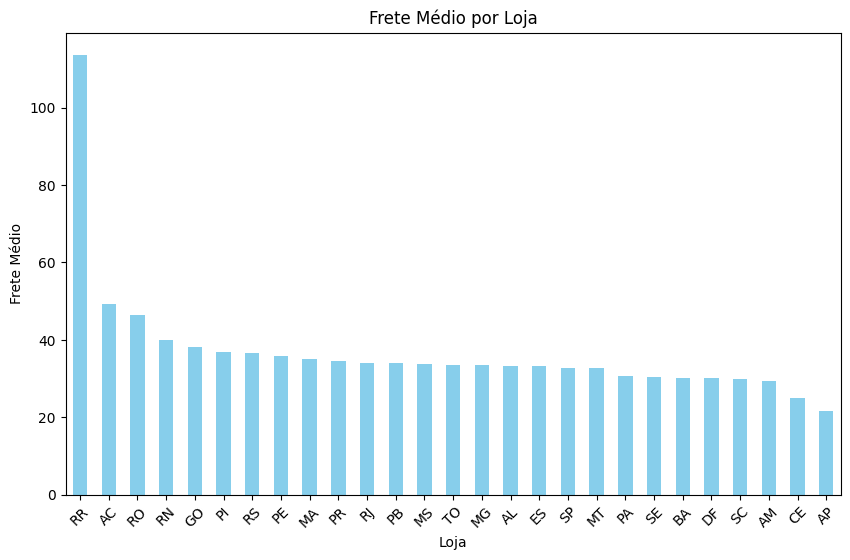

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# URLs dos arquivos CSV
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

# Carregar os dados das lojas
loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

# Concatenar todos os DataFrames em um só
df = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

# Exibir as primeiras linhas e as colunas para verificar os nomes
print(df.head())
print(df.columns)  # Mostrar as colunas para verificar como estão nomeadas

# Garantir que as colunas estão sem espaços extras
df.columns = df.columns.str.strip()

# Calcular o frete médio por loja
frete_medio_por_loja = df.groupby('Local da compra')['Frete'].mean().sort_values(ascending=False)

# Exibir o frete médio por loja
print("Frete Médio por Loja:")
print(frete_medio_por_loja)

# Visualização do frete médio por loja
plt.figure(figsize=(10, 6))
frete_medio_por_loja.plot(kind='bar', color='skyblue')
plt.title('Frete Médio por Loja')
plt.xlabel('Loja')
plt.ylabel('Frete Médio')
plt.xticks(rotation=45)
plt.show()
